Simple Linear Regression: $$Y = \beta_0 + \beta_1 X + \epsilon$$

Multiple Linear Regression: $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$
$$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$

Multiple Linear Regression with Interaction Effect: $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \beta_4 \times TV \times radio + \epsilon$$

# Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

# Step 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper in 200 different markets. The units are in thousands of dollars.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
#store data in pandas data frame
advert = pd.read_csv("/content/drive/My Drive/Data Sets/Predict Sales/Advertising.csv")
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Step 3: Exploratory Data Analysis

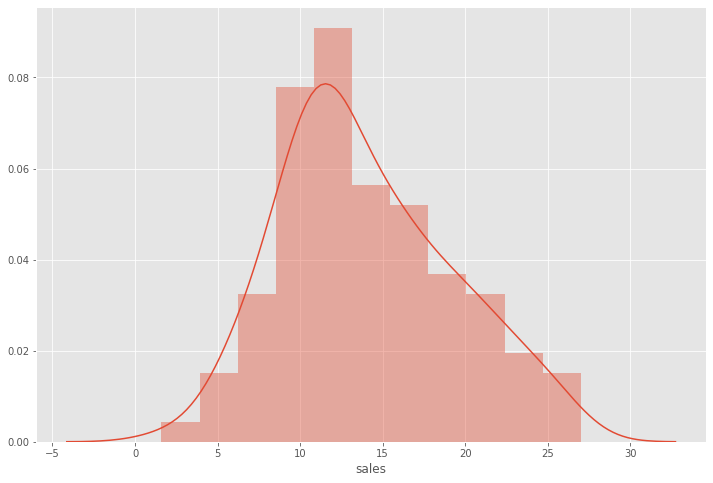

In [12]:
import seaborn as sns
sns.distplot(advert.sales)

Distribution of response variable Sales normal

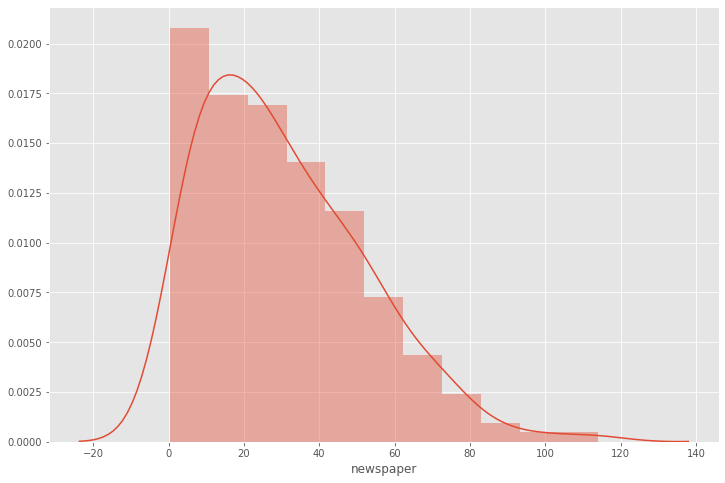

In [13]:
sns.distplot(advert.newspaper)

Distribution of newspaper spend feature is right skewed

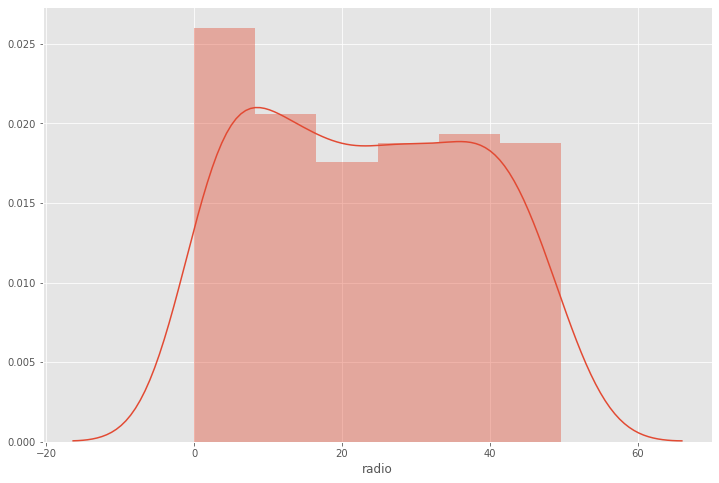

In [14]:
sns.distplot(advert.radio)

Distribution of radio spend feature is uniform with smaller spend

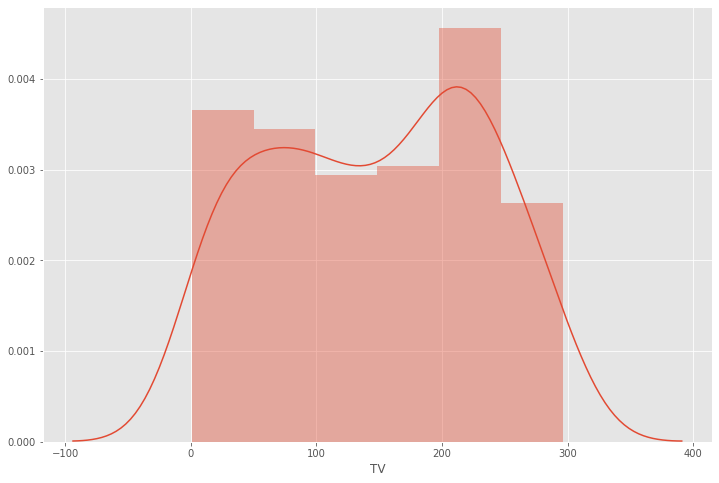

In [15]:
sns.distplot(advert.TV)

Distribution of TV spend feature is uniform with larger spend

# Step 4: Relationship between Features and Response

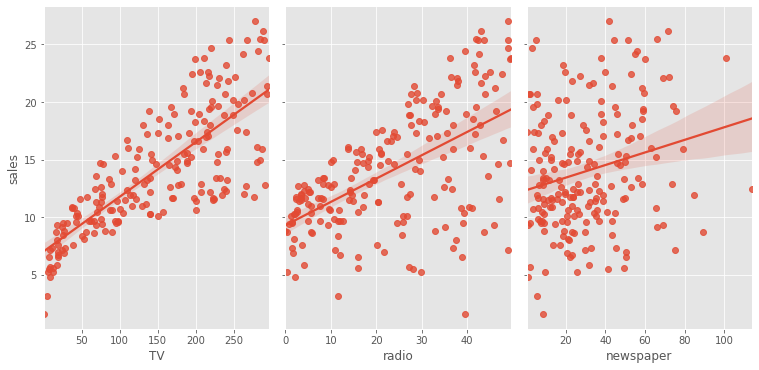

In [16]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=0.7, kind='reg')

In [17]:
advert.TV.corr(advert.sales)

0.7822244248616061

Strong correlation between TV spend and Sales

In [18]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


All correlations in a table

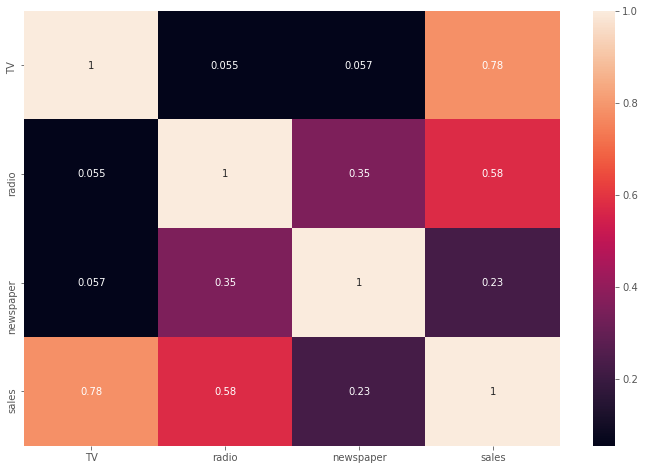

In [19]:
sns.heatmap(advert.corr(), annot=True)

All correlations visualized in a heatmap

# Step 5: Creating the Simple Linear Regression Model

In [20]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [22]:
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [25]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Step 6: Interpreting Model Coefficients

In [26]:
print(linreg.intercept_)
print(linreg.coef_)

6.9119726188687185
[0.04802945]


# Step 7: Making Predictions with our Model

In [27]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

# Step 8: Model Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [30]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

2.4643080986027908


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [31]:
print(metrics.mean_squared_error(y_test, y_pred))

10.310069587813155


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542


RMSE is in terms of response value i.e. sales in this case.

# Step 9: Multiple Linear Regression - Estimating Coefficients

In [34]:
from sklearn.linear_model import LinearRegression

X = advert[['TV', 'radio', 'newspaper']]
Y = advert.sales

lm1 = LinearRegression()
lm1.fit(X, Y)

print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [35]:
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

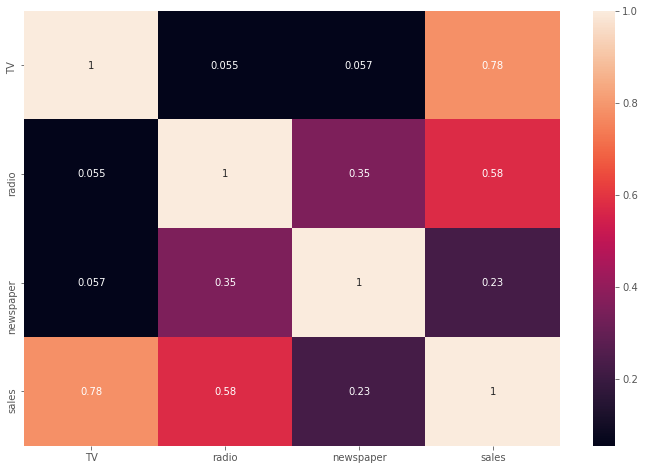

In [36]:
sns.heatmap(advert.corr(), annot=True);

# Step 10: Feature Selection

In [37]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], Y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(Y, lm2_preds))

R^2:  0.8971942610828957


In [38]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], Y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(Y, lm3_preds))

R^2:  0.8972106381789522


# Step 11: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Use train/test split with RMSE to see whether newspaper should be kept in the model:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'radio', 'newspaper']]
Y = advert.sales

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

lm4 = LinearRegression().fit(X_train, Y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm4_preds)))
print("R^2: ", r2_score(Y_test, lm4_preds))

RMSE:  1.404651423032895
R^2:  0.9156213613792232


In [40]:
X = advert[['TV', 'radio']]
Y = advert.sales

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

lm5 = LinearRegression().fit(X_train, Y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm5_preds)))
print("R^2: ", r2_score(Y_test, lm5_preds))

RMSE:  1.3879034699382888
R^2:  0.9176214942248907


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


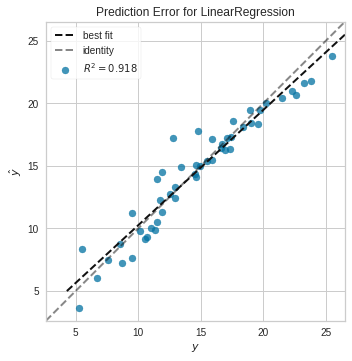

In [41]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof();

# Step 12: Interaction Effect (Synergy)

In [42]:
advert['interaction'] = advert['TV'] * advert['radio']

X = advert[['TV', 'radio', 'interaction']]
Y = advert.sales

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

lm6 = LinearRegression().fit(X_train, Y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm6_preds)))
print("R^2: ", r2_score(Y_test, lm6_preds))

RMSE:  0.7011871137164328
R^2:  0.978973681468126


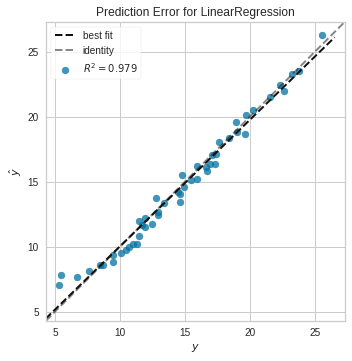

In [43]:
visualizer = PredictionError(lm6).fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof();